In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from scipy import stats
import seaborn as sns

In [3]:
df = pd.read_excel('Daily Update Data Agregat Covid-19 Jakarta.xlsx',sheet_name='Hasil Lab')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [4]:
df = df.iloc[:,:9]

In [5]:
df.set_index(df['Tanggal'],inplace=True)

In [6]:
df

,Tanggal,Jumlah Orang di Test,Orang Positif Harian,Orang Negatif Harian,Positivity Rate Kasus Baru Harian,Total Spesimen di Test,Positif,Negatif,Positivity Rate Spesimen Harian
Tanggal,,,,,,,,,
2020-02-29,2020-02-29,40,0,40,0.000000,40,0,40,"0,0%"
2020-03-01,2020-03-01,39,0,39,0.000000,39,0,39,"0,0%"
2020-03-02,2020-03-02,3,0,3,0.000000,3,0,3,"0,0%"
2020-03-03,2020-03-03,15,3,12,0.200000,15,3,12,"20,0%"
2020-03-04,2020-03-04,7,0,7,0.000000,7,0,7,"0,0%"
2020-03-05,2020-03-05,27,0,27,0.000000,27,3,24,"11,1%"
2020-03-06,2020-03-06,5,0,5,0.000000,5,0,5,"0,0%"
2020-03-07,2020-03-07,26,0,26,0.000000,26,0,26,"0,0%"
2020-03-08,2020-03-08,56,1,55,0.017857,56,0,56,"0,0%"


In [7]:
df_perbulan = df[['Orang Positif Harian','Orang Negatif Harian']].resample('M').sum()
df_perbulan = df_perbulan.rename(columns={'Orang Positif Harian':'Orang Positif Bulanan',
                                        'Orang Negatif Harian':'Orang Negatif Bulanan'})

In [8]:
df_perbulan['Tanggal'] = df_perbulan.index

Text(0, 0.5, 'Jumlah')

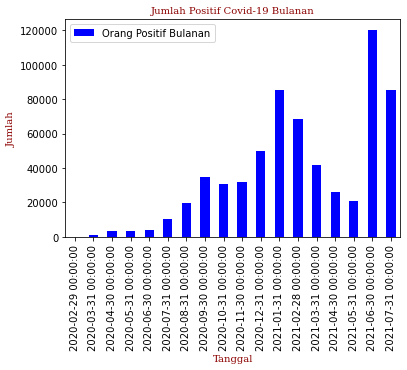

In [9]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

df_perbulan.plot.bar(x='Tanggal', y='Orang Positif Bulanan', color='blue',fontsize=10)
plt.legend(prop={'size': 10})
plt.title('Jumlah Positif Covid-19 Bulanan',fontsize=10,fontdict=font)
plt.xlabel('Tanggal',size = 10,fontdict=font)
plt.ylabel('Jumlah',size = 10,fontdict=font)

Text(0, 0.5, 'Jumlah')

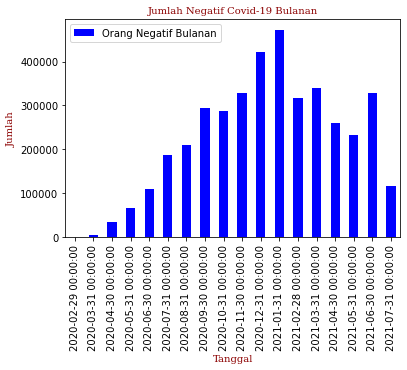

In [10]:
df_perbulan.plot.bar(x='Tanggal', y='Orang Negatif Bulanan', color='blue',fontsize=10)
plt.legend(prop={'size': 10})
plt.title('Jumlah Negatif Covid-19 Bulanan',fontsize=10,fontdict=font)
plt.xlabel('Tanggal',size = 10,fontdict=font)
plt.ylabel('Jumlah',size = 10,fontdict=font)

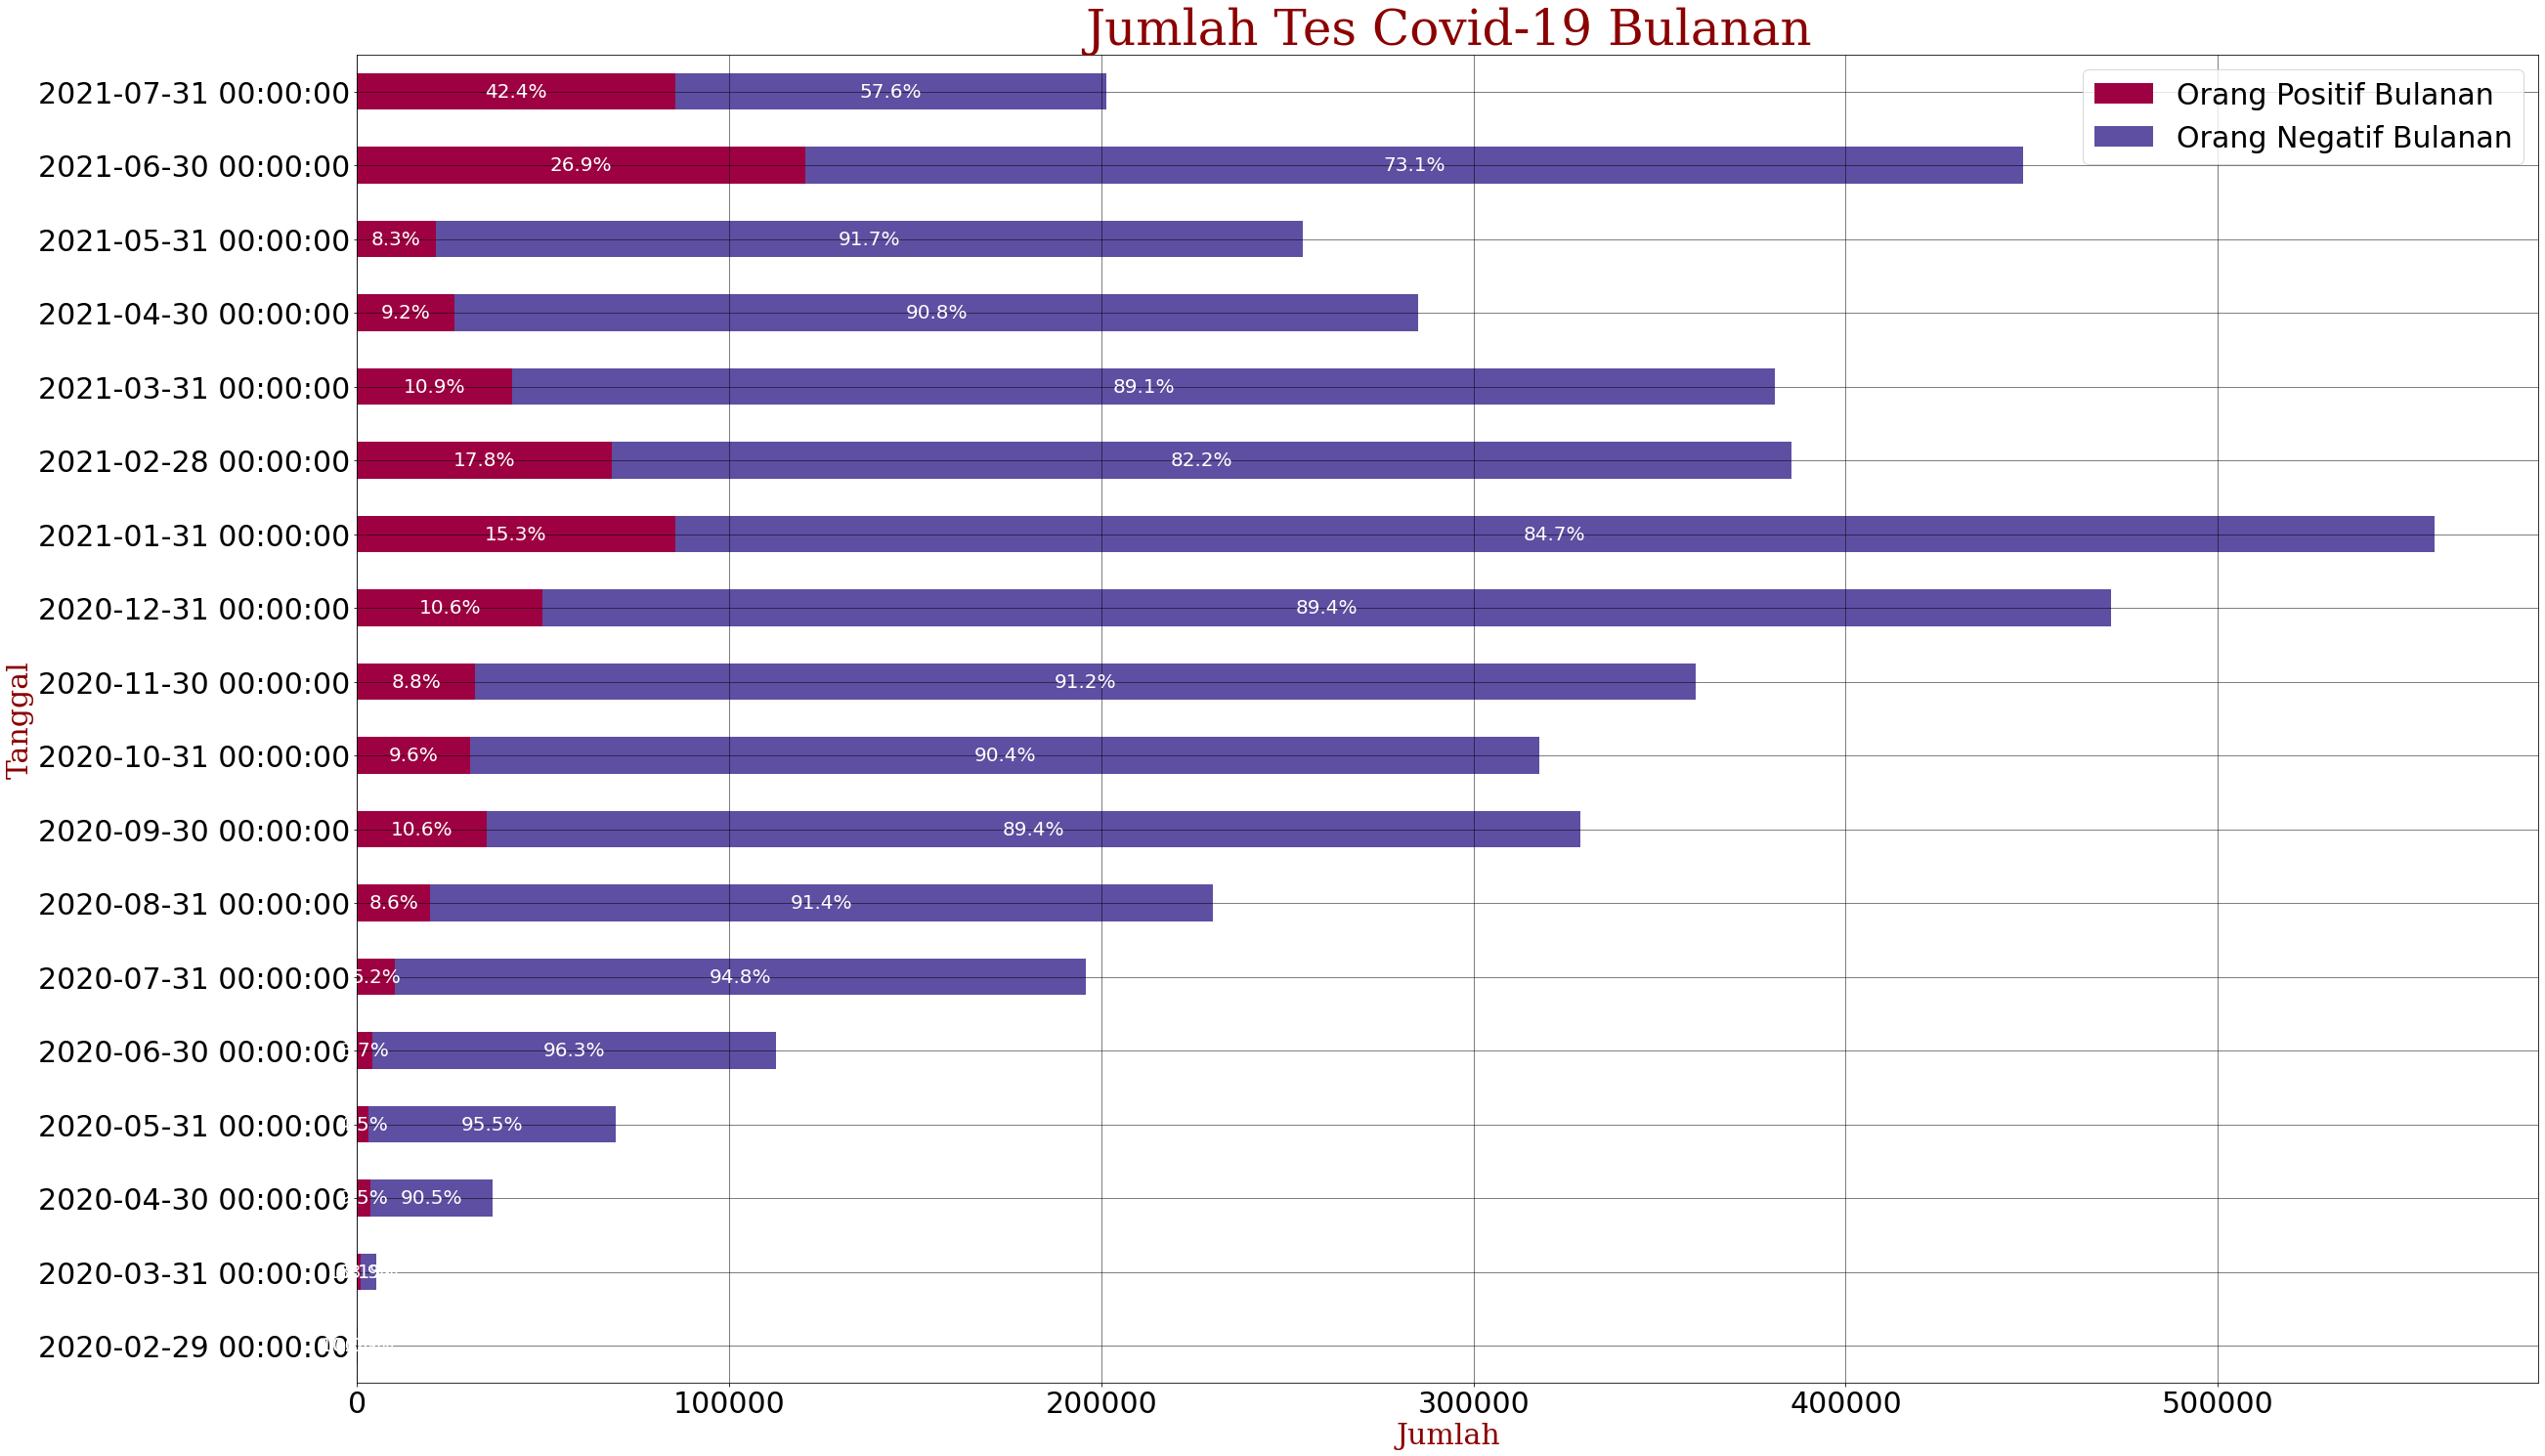

In [36]:
ax2 = df_perbulan.plot(
    x = 'Tanggal',
    kind = 'barh',
    stacked = True,
    mark_right = True,
    figsize=(40,25),
    fontsize=30,
    colormap='Spectral')
ax2.grid(linewidth=0.5,color='black',b=True)
ax2.legend(prop={'size': 30})
plt.title('Jumlah Tes Covid-19 Bulanan',fontsize=50,fontdict=font)
plt.ylabel('Tanggal',size = 30,fontdict=font)
plt.xlabel('Jumlah',size = 30,fontdict=font)

df_total = df_perbulan['Orang Positif Bulanan'] + df_perbulan["Orang Negatif Bulanan"]
df_rel = df_perbulan[df_perbulan.columns[:2]].div(df_total, 0) * 100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df_perbulan.iloc[:,:2].cumsum(1)[n], 
                                         df_perbulan[n], df_rel[n])):
        plt.text(cs - ab /2 , i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center',fontsize = 20,color='white')